# **Decision Tree**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
X = df.drop('salary_more_then_100k',axis='columns')
y = df['salary_more_then_100k']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
X['company_n'] = le_company.fit_transform(X['company'])
X['job_n'] = le_job.fit_transform(X['job'])
X['degree_n'] = le_degree.fit_transform(X['degree'])

In [ ]:
X

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
X_new = X.drop(['company','job','degree'],axis='columns')

In [ ]:
X_new

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_new, y)

DecisionTreeClassifier()

In [ ]:
model.score(X_new,y)

1.0

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

# **Titanic Survival Prediction**

Using the Dataset I provided, create a decision tree to predict which people have higher chance for survival.

Use the following columns and build a model to predict if person would survive or not,
1. Pclass
2. Sex
3. Age
4. Fare

Calculate score of your model

# **Support Vector Machine**

https://www.youtube.com/watch?v=_YPScrckx28

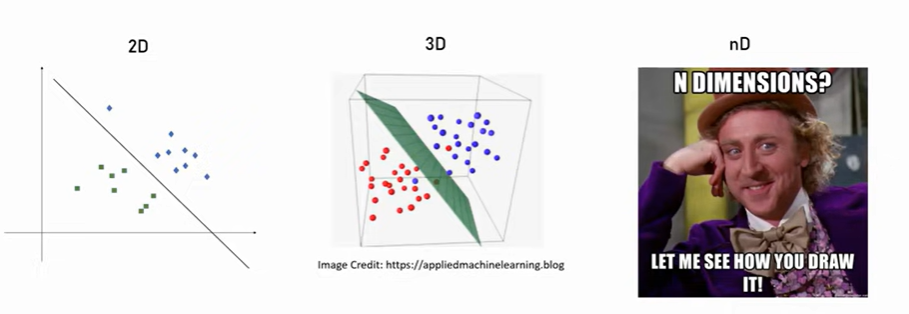

**Gamma Parameter Tuning**

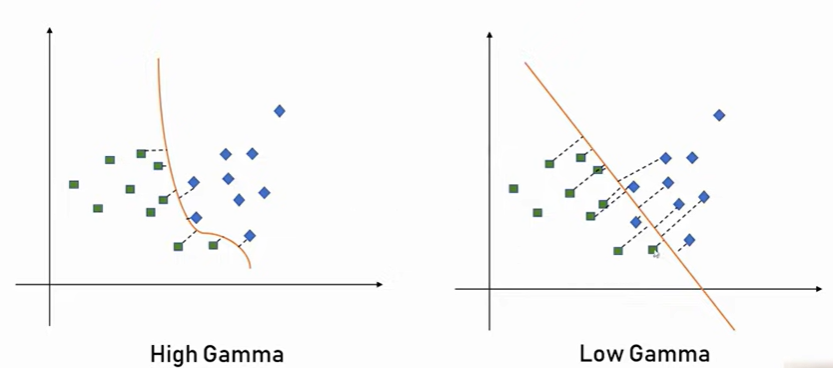

**Regularization Tuning**

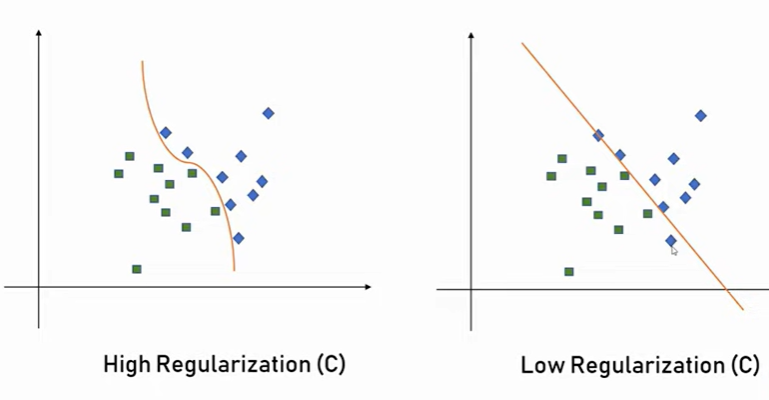

**Transformation (Plain Switching)**

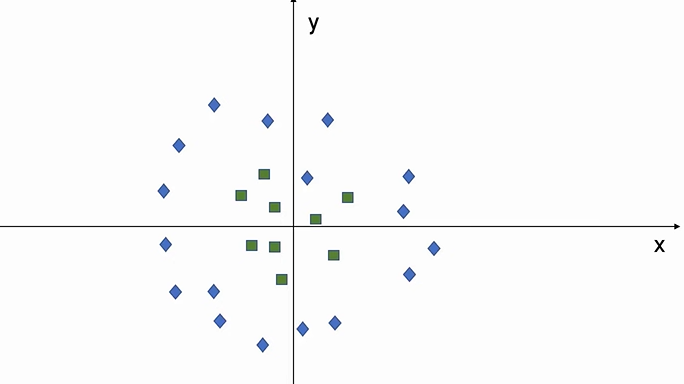

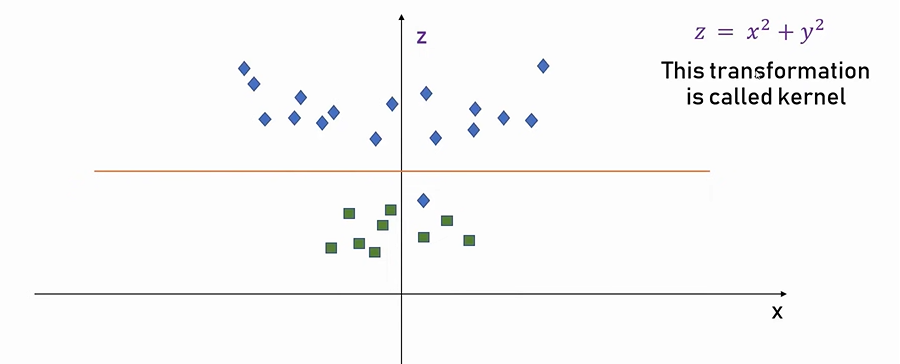

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [8]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [12]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

**Sepal Length Vs. Sepal Width (Setosa and Versicolor)**

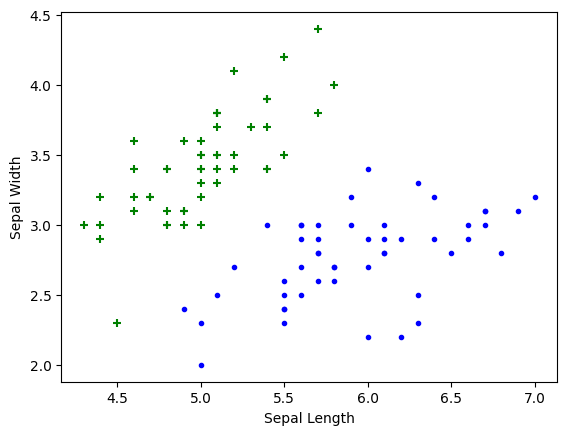

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

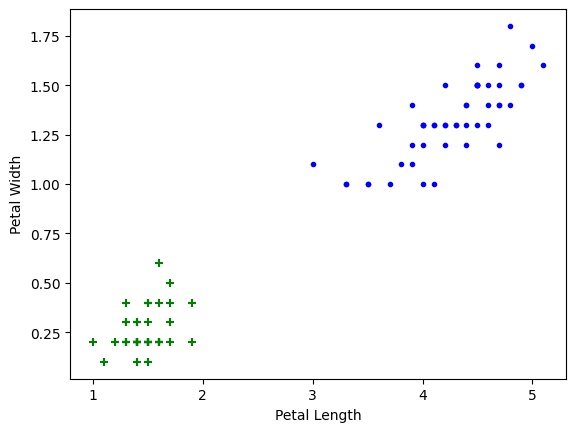

In [14]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

**Training of Model**

In [15]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [17]:
from sklearn.svm import SVC
model = SVC()

In [18]:
model.fit(X_train, y_train)

SVC()

In [19]:
model.score(X_test, y_test)

0.9666666666666667

In [20]:
model.predict([[4.8,3.0,1.5,0.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

**Parameter Tuning**

In [ ]:
# Regularization
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

In [ ]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

In [ ]:
# Gamma
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

In [ ]:
# Kernel
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

In [ ]:
model_linear_kernal.score(X_test, y_test)

**Exercise**

Train SVM classifier using from sklearn.datasets import load_digits.

Measure accuracy of your model using different kernels such as rbf and linear.

Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score

Use 80% of samples as training data size

# **Random Forest**

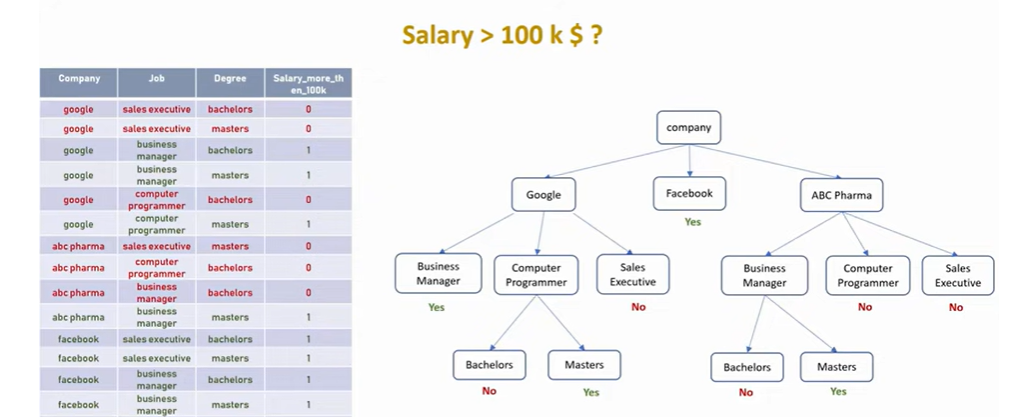

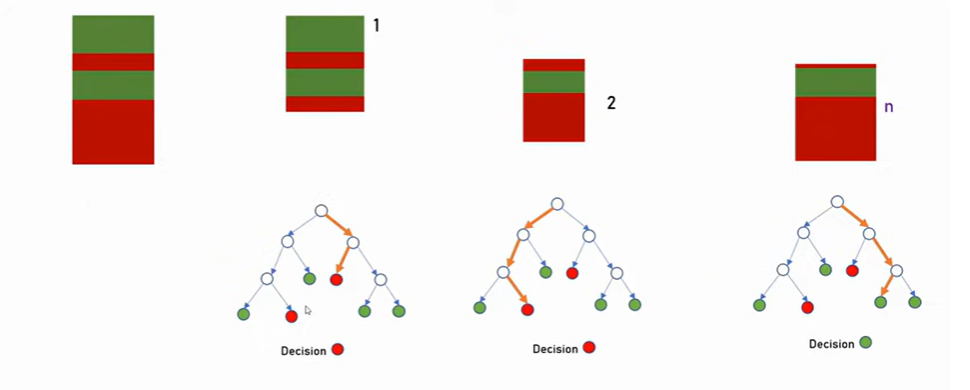

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

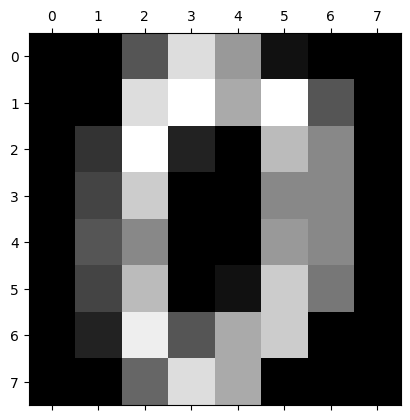

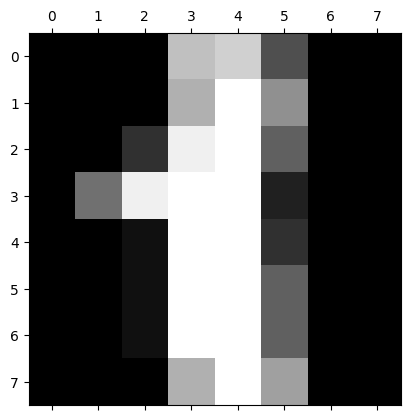

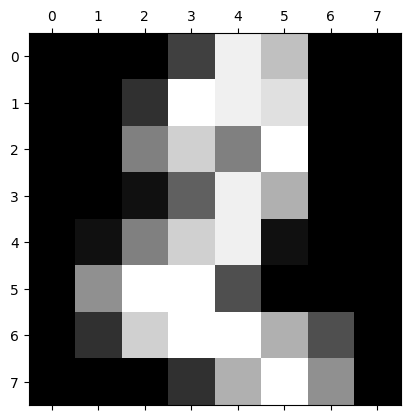

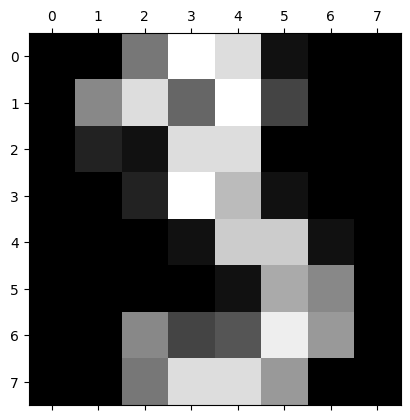

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [ ]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target'] = digits.target

In [ ]:
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


**Train and the model and prediction**

In [ ]:
X = df.drop('target',axis='columns')
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
model.score(X_test, y_test)

0.9666666666666667

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
339,0.0,0.0,8.0,14.0,15.0,6.0,0.0,0.0,0.0,4.0,...,7.0,0.0,0.0,0.0,11.0,16.0,16.0,10.0,0.0,0.0
1197,0.0,0.0,13.0,14.0,12.0,15.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,16.0,8.0,0.0,0.0,0.0
1226,0.0,0.0,9.0,16.0,10.0,2.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,6.0,16.0,16.0,14.0,1.0,0.0
763,0.0,0.0,8.0,14.0,16.0,16.0,1.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,10.0,16.0,4.0,0.0,0.0,0.0
292,0.0,0.0,9.0,16.0,15.0,14.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,8.0,15.0,10.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.0,0.0,0.0,4.0,12.0,15.0,4.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,10.0,16.0,8.0,0.0
1371,0.0,0.0,7.0,16.0,12.0,0.0,0.0,0.0,0.0,1.0,...,7.0,1.0,0.0,0.0,6.0,13.0,12.0,12.0,15.0,12.0
59,0.0,1.0,10.0,15.0,11.0,1.0,0.0,0.0,0.0,3.0,...,1.0,0.0,0.0,0.0,13.0,16.0,15.0,10.0,0.0,0.0
1089,0.0,1.0,13.0,16.0,16.0,10.0,0.0,0.0,0.0,8.0,...,12.0,0.0,0.0,1.0,15.0,16.0,16.0,14.0,3.0,0.0


In [ ]:
y_test

339     3
1197    8
1226    9
763     5
292     0
       ..
645     8
1371    2
59      3
1089    3
1622    7
Name: target, Length: 360, dtype: int64

In [ ]:
y_predicted

array([3, 8, 9, 5, 0, 1, 8, 9, 7, 3, 2, 3, 1, 3, 8, 7, 0, 0, 1, 0, 1, 7,
       6, 8, 0, 1, 2, 9, 1, 9, 8, 8, 1, 6, 6, 0, 4, 0, 0, 6, 3, 7, 6, 6,
       4, 1, 4, 2, 9, 3, 7, 5, 4, 2, 0, 5, 4, 8, 1, 6, 2, 1, 4, 4, 2, 3,
       5, 9, 9, 2, 1, 3, 1, 7, 1, 8, 3, 1, 3, 1, 0, 2, 1, 9, 0, 9, 7, 9,
       1, 1, 4, 2, 6, 3, 3, 1, 3, 1, 1, 3, 4, 4, 3, 6, 6, 1, 3, 2, 9, 7,
       1, 6, 3, 1, 1, 3, 1, 3, 8, 1, 4, 6, 9, 0, 0, 5, 5, 7, 7, 2, 0, 9,
       0, 4, 7, 6, 7, 2, 4, 9, 0, 7, 2, 5, 9, 5, 8, 3, 7, 2, 9, 0, 0, 8,
       5, 8, 9, 4, 1, 3, 0, 7, 4, 6, 7, 5, 0, 3, 1, 2, 4, 2, 1, 8, 8, 9,
       4, 2, 8, 7, 1, 4, 5, 4, 5, 3, 5, 8, 2, 0, 2, 5, 3, 2, 7, 5, 1, 2,
       7, 7, 8, 6, 2, 1, 8, 7, 9, 8, 2, 2, 8, 4, 1, 4, 2, 3, 2, 4, 1, 5,
       8, 2, 3, 1, 9, 5, 0, 2, 6, 9, 1, 3, 1, 0, 7, 2, 0, 2, 1, 8, 4, 5,
       3, 3, 3, 7, 2, 6, 9, 1, 9, 2, 4, 2, 6, 9, 1, 5, 1, 2, 1, 9, 5, 5,
       5, 8, 9, 5, 5, 6, 0, 2, 5, 3, 2, 9, 9, 4, 4, 6, 6, 3, 3, 5, 3, 0,
       8, 7, 9, 2, 4, 8, 0, 5, 1, 6, 3, 6, 4, 1, 3,

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 36,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 27,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  0, 31]])

Text(95.72222222222221, 0.5, 'Truth')

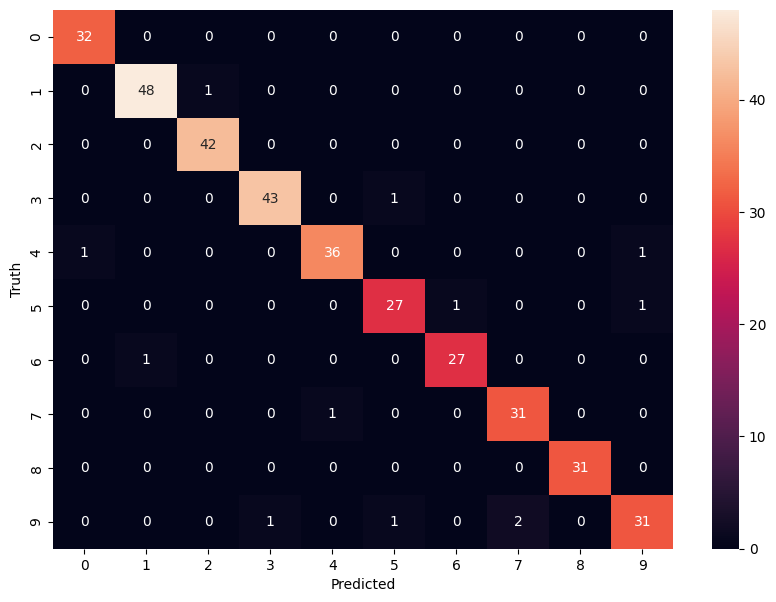

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

Measure prediction score using default n_estimators (10)
Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

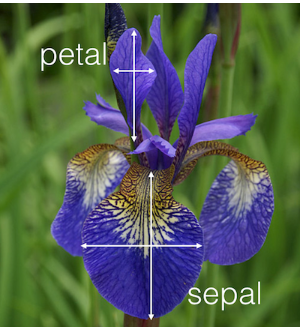